In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# O número de classes foi ajustado para 4, conforme o seu relatório.
def build_cnn_model(input_shape=(224, 224, 3), num_classes=4):
    model = Sequential()

    # Bloco 1
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape)) # Adicionado padding='same'
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) # NOVA CAMADA: Mais uma conv para aprender features iniciais
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3)) # AUMENTADO: Dropout aumentado para 0.3

    # Bloco 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) # Adicionado padding='same'
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) # NOVA CAMADA: Aprofundando a extração de features
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4)) # AUMENTADO: Dropout aumentado para 0.4

    # Bloco 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # Adicionado padding='same'
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # NOVA CAMADA: Mais profundidade
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5)) # AUMENTADO: Dropout aumentado para 0.5 (era 0.25)

    # Camada de flattening
    model.add(Flatten())

    # Camada totalmente conectada
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Camada de saída - Corrigido para o número correto de classes
    model.add(Dense(num_classes, activation='softmax'))

    return model

if __name__ == "__main__":
    # Verificando a nova arquitetura
    model = build_cnn_model()
    model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 51,673,636 (197.12 MB)

 Trainable params: 51,671,716 (197.11 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
import os
import shutil
import random
from google.colab import drive

# 1. Montar o Google Drive
drive.mount('/content/drive')

def split_dataset(source_dir, dest_dir, train_ratio=0.8):
    # Cria pastas de destino (train e val)
    train_dir = os.path.join(dest_dir, "train")
    val_dir = os.path.join(dest_dir, "test")
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # Para cada classe (subpasta dentro de source_dir)
    for class_name in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        # Lista de imagens
        images = os.listdir(class_path)
        random.shuffle(images)  # embaralhar para aleatoriedade

        # Split train/val
        split_index = int(len(images) * train_ratio)
        train_images = images[:split_index]
        val_images = images[split_index:]

        # Cria pastas de classe dentro de train e val
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

        # Copia arquivos
        for img in train_images:
            shutil.copy(os.path.join(class_path, img),
                        os.path.join(train_dir, class_name, img))

        for img in val_images:
            shutil.copy(os.path.join(class_path, img),
                        os.path.join(val_dir, class_name, img))

    print(" Divisão concluída")
    print(f" Treino: {train_dir}")
    print(f" Validação: {val_dir}")


if __name__ == "__main__":
    # Pasta de origem (onde estão TomateSaudavel, LeafMiner, Cacau Saudável e Pod Rot)
    source = "/content/drive/MyDrive/TCC7/Culturas"

    # Pasta de destino (onde será criado o train/ e val/)
    destination = "/content/drive/MyDrive/TCC7/data"

    split_dataset(source, destination, train_ratio=0.8)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KeyboardInterrupt: 

In [ ]:
# Bloco de Código Final para Criar, Verificar e Recarregar o Módulo

# 1. Importar a biblioteca para manipulação de importações
import importlib

# 2. Definir o conteúdo exato do arquivo model.py
model_code = """
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def build_cnn_model(input_shape=(224, 224, 3), num_classes=2):
    print("--- Executando a função build_cnn_model de dentro do módulo 'model' ---")
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model
"""

# 3. Escrever o conteúdo no arquivo /content/model.py
with open('/content/model.py', 'w') as f:
    f.write(model_code)

print(" Arquivo /content/model.py foi criado/sobrescrito com sucesso!")

# 4. Tentar importar e forçar o recarregamento
try:
    # Primeiro, importe o módulo 'model'
    import model

    # Forçando o Python a reler o arquivo do disco
    importlib.reload(model)

    # Agora que o módulo foi recarregado, importando a função específica dele
    from model import build_cnn_model

    print(" Sucesso! O módulo foi recarregado e a função 'build_cnn_model' foi importada.")

    # Verificação final
    test_model = build_cnn_model()
    print(" Modelo de teste construído com sucesso.")

except Exception as e:
    print(f" ERRO FINAL: A importação falhou mesmo após recarregar. Erro: {e}")
    print("\nNeste ponto, a única solução é reiniciar o ambiente. Vá em 'Ambiente de execução' > 'Reiniciar sessão', e depois execute esta célula novamente ANTES de rodar a célula de treinamento.")


✅ Arquivo /content/model.py foi criado/sobrescrito com sucesso!
✅ Sucesso! O módulo foi recarregado e a função 'build_cnn_model' foi importada.
--- Executando a função build_cnn_model de dentro do módulo 'model' ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Modelo de teste construído com sucesso.


In [ ]:
import numpy as np
from tensorflow.keras.optimizers import Adam
#  MUDANÇA 1: Importar Callback e classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from sklearn.metrics import classification_report
from model import build_cnn_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import os

#  MUDANÇA 2: DEFINIÇÃO DO CALLBACK CUSTOMIZADO
class MetricsAndSaveCallback(Callback):
    def __init__(self, validation_generator, filepath, min_precision=0.85, min_recall=0.85):
        super(MetricsAndSaveCallback, self).__init__()
        self.validation_generator = validation_generator
        self.filepath = filepath
        self.min_precision = min_precision
        self.min_recall = min_recall
        self.best_macro_f1 = -1  # Usando o F1-score médio como critério de "melhor"

    def on_epoch_end(self, epoch, logs=None):
        # 1. Obter as previsões do modelo no set de validação
        y_pred_proba = self.model.predict(self.validation_generator)
        y_pred = np.argmax(y_pred_proba, axis=1)
        y_true = self.validation_generator.classes
        class_names = list(self.validation_generator.class_indices.keys())

        # 2. Calcular o relatório de classificação
        report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True, zero_division=0)
        print("\n--- Relatório de Classificação da Época ---")
        print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

        # 3. Verificar se todas as classes atendem ao critério
        all_classes_ok = True
        for class_name in class_names:
            precision = report[class_name]['precision']
            recall = report[class_name]['recall']
            if precision < self.min_precision or recall < self.min_recall:
                all_classes_ok = False
                print(f" Critério NÃO atendido para a classe: {class_name} (Precision: {precision:.2f}, Recall: {recall:.2f})")
                break # Não precisa checar as outras

        # 4. Se o critério foi atendido E o modelo melhorou, salvar
        if all_classes_ok:
            current_macro_f1 = report['macro avg']['f1-score']
            print(f" Todos os critérios foram atendidos! F1-Score (macro): {current_macro_f1:.4f}")

            if current_macro_f1 > self.best_macro_f1:
                print(f" Novo melhor modelo encontrado! Salvando em {self.filepath} (F1 anterior: {self.best_macro_f1:.4f})")
                self.best_macro_f1 = current_macro_f1
                self.model.save(self.filepath)
            else:
                print(f" Critérios atendidos, mas o F1-Score ({current_macro_f1:.4f}) não superou o melhor anterior ({self.best_macro_f1:.4f}).")
        else:
            print("--- Fim do Relatório da Época ---\n")


def train_model():
    train_dir = "/content/drive/MyDrive/TCC7/data/train"
    val_dir = "/content/drive/MyDrive/TCC7/data/test"

    train_datagen = ImageDataGenerator(
        rescale=1.0/255.0, rotation_range=30, width_shift_range=0.15,
        height_shift_range=0.15, zoom_range=0.25, horizontal_flip=True,
        shear_range=0.2, brightness_range=[0.8, 1.2]
    )
    val_datagen = ImageDataGenerator(rescale=1.0/255.0)

    train_generator = train_datagen.flow_from_directory(
        train_dir, target_size=(224, 224), batch_size=32, class_mode="categorical"
    )
    val_generator = val_datagen.flow_from_directory(
        val_dir, target_size=(224, 224), batch_size=32, class_mode="categorical",
        shuffle=False # IMPORTANTE: shuffle=False para validação
    )

    num_classes = len(train_generator.class_indices)
    classes = train_generator.classes
    class_weights = compute_class_weight('balanced', classes=np.unique(classes), y=classes)
    class_weights_dict = dict(enumerate(class_weights))
    print(f"Pesos de Classe Calculados: {class_weights_dict}")

    model = build_cnn_model(input_shape=(224, 224, 3), num_classes=num_classes)

    model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

    # MUDANÇA 3: CONFIGURAR OS CALLBACKS
    early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True) # Aumentei a paciência

    # Este checkpoint agora é um "backup" do melhor modelo baseado em val_loss
    backup_checkpoint = ModelCheckpoint(
        filepath="/content/drive/MyDrive/TCC7/models/best_val_loss_model.keras",
        monitor="val_loss", save_best_only=True, verbose=0
    )

    # callback customizado
    metrics_saver_callback = MetricsAndSaveCallback(
        validation_generator=val_generator,
        filepath="/content/drive/MyDrive/TCC7/models/best_metrics_model.keras"
    )

    history = model.fit(
        train_generator,
        epochs=50,
        validation_data=val_generator,
        # MUDANÇA 4: USAR O NOVO CALLBACK
        callbacks=[early_stop, backup_checkpoint, metrics_saver_callback],
        class_weight=class_weights_dict,
        verbose=1
    )

    np.save("/content/drive/MyDrive/TCC7/models/history.npy", history.history)
    print(" Treinamento concluído.")

if __name__ == "__main__":
    train_model()

Found 8655 images belonging to 4 classes.
Found 2165 images belonging to 4 classes.
Pesos de Classe Calculados: {0: np.float64(0.8088785046728972), 1: np.float64(1.1994179600886918), 2: np.float64(0.6323056691992986), 3: np.float64(2.8696949602122017)}
--- Executando a função build_cnn_model de dentro do módulo 'model' ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 31s 446ms/step

--- Relatório de Classificação da Época ---
                precision    recall  f1-score   support

 CacauSaudavel       0.00      0.00      0.00       669
     LeafMiner       0.18      0.67      0.28       451
TomateSaudavel       0.00      0.00      0.00       856
 black_pod_rot       0.05      0.13      0.08       189

      accuracy                           0.15      2165
     macro avg       0.06      0.20      0.09      2165
  weighted avg       0.04      0.15      0.06      2165

⚠️ Critério NÃO atendido para a classe: CacauSaudavel (Precision: 0.00, Recall: 0.00)
--- Fim do Relatório da Época ---

271/271 ━━━━━━━━━━━━━━━━━━━━ 6405s 23s/step - accuracy: 0.6629 - loss: 1.0069 - val_accuracy: 0.1501 - val_loss: 53.0989
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 33s 472ms/step

--- Relatório de Classificação da Época ---
                precision    recall  f1-score   support

 CacauSaudavel       0.95      0.12      0.21       66

In [ ]:
import numpy as np
import os
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
from tensorflow.keras.models import load_model

def load_trained_model():
  #Carrega o modelo treinado

    # Aponta para o modelo salvo pelo callback customizado.
    model_path = '/content/drive/MyDrive/TCC7/models/best_metrics_model.keras'

    # A verificação para garantir que o arquivo existe está correto.
    if not os.path.exists(model_path):
        raise FileNotFoundError(
            f"Arquivo não encontrado em: {model_path}. "
            "Verifique se o treinamento foi concluído com sucesso e se o caminho está correto."
        )
    model = load_model(model_path)
    print(f" Modelo otimizado por métricas carregado com sucesso de '{model_path}'")
    return model

# Exemplo de como usar a função
if __name__ == '__main__':
    try:
        # Tenta carregar o modelo
        trained_model = load_trained_model()
        # Mostra um resumo para confirmar que carregou corretamente
        trained_model.summary()
    except FileNotFoundError as e:
        print(e)

✅ Modelo otimizado por métricas carregado com sucesso de '/content/drive/MyDrive/TCC7/models/best_metrics_model.keras'


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,200,334 (508.12 MB)

 Trainable params: 44,399,620 (169.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

 Optimizer params: 88,799,242 (338.74 MB)

 Modelo otimizado por métricas carregado com sucesso de '/content/drive/MyDrive/TCC7/models/best_metrics_model.keras'


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,200,334 (508.12 MB)

 Trainable params: 44,399,620 (169.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

 Optimizer params: 88,799,242 (338.74 MB)

Found 3545 images belonging to 4 classes.

Avaliando o modelo no conjunto de teste...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


111/111 ━━━━━━━━━━━━━━━━━━━━ 730s 7s/step - accuracy: 0.9690 - loss: 0.1006

Acurácia no Conjunto de Teste: 95.43%

Fazendo previsões para o relatório de classificação...
111/111 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step

Relatório de Classificação Final:
                 precision    recall  f1-score   support

 CacauSaudavel       0.96      0.98      0.97      1199
     LeafMiner       0.95      0.86      0.90       451
TomateSaudavel       0.96      0.99      0.97      1554
 black_pod_rot       0.93      0.84      0.88       341

      accuracy                           0.95      3545
     macro avg       0.95      0.92      0.93      3545
  weighted avg       0.95      0.95      0.95      3545


Gerando a Matriz de Confusão...


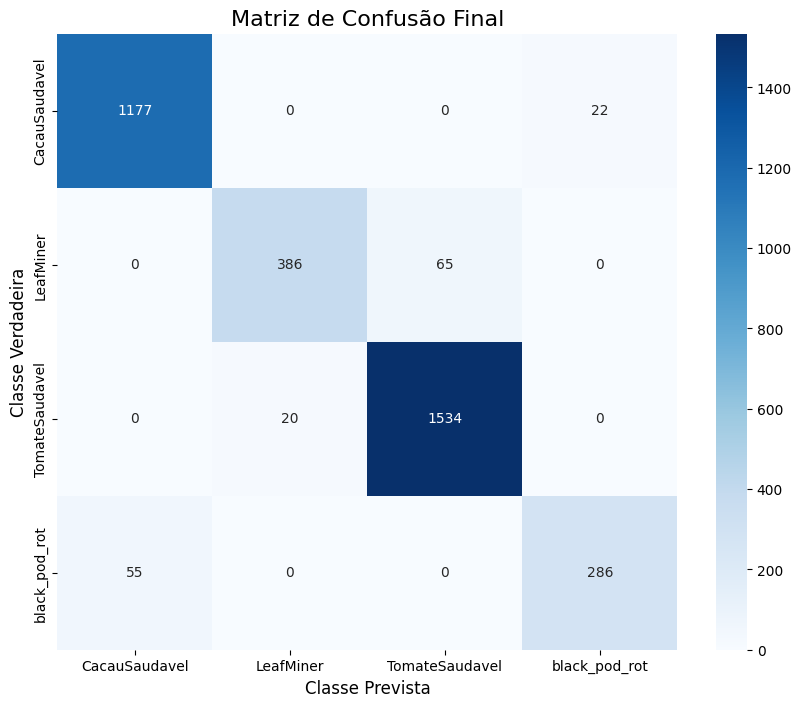

In [ ]:
import numpy as np
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# FUNÇÃO PARA CARREGAR O MODELO OTIMIZADO

def load_trained_model():
    """
    Carrega o modelo treinado
    """
    # Caminho para o modelo salvo pelo nosso callback customizado.
    model_path = '/content/drive/MyDrive/TCC7/models/best_metrics_model.keras'

    # Verificação para garantir que o arquivo existe.
    if not os.path.exists(model_path):
        raise FileNotFoundError(
            f"Arquivo não encontrado em: {model_path}. "
            "Verifique se o treinamento foi concluído com sucesso e se o caminho está correto."
        )

    model = load_model(model_path)
    print(f" Modelo otimizado por métricas carregado com sucesso de '{model_path}'")
    return model


# PASSO 1: Carregar o modelo e verificar.

try:
    model = load_trained_model()
    model.summary()

    # PASSO 2: Definir o caminho para o diretório de AVALIAÇÃO (`test`).

    eval_dir = '/content/drive/MyDrive/TCC7/data/test'

    # Verificação para garantir que o diretório existe
    if not os.path.isdir(eval_dir):
        raise FileNotFoundError(f"ERRO: O diretório de avaliação não foi encontrado em '{eval_dir}'.")

    # PASSO 3: Criar o gerador de dados para avaliação.

    eval_datagen = ImageDataGenerator(rescale=1./255) # Apenas normalização

    eval_generator = eval_datagen.flow_from_directory(
        eval_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False # Essencial para a avaliação ser correta
    )

    # PASSO 4: Avaliar o modelo e gerar o relatório de classificação.

    print("\nAvaliando o modelo no conjunto de teste...")
    eval_loss, eval_acc = model.evaluate(eval_generator, verbose=1)
    print(f'\nAcurácia no Conjunto de Teste: {eval_acc * 100:.2f}%')

    print("\nFazendo previsões para o relatório de classificação...")
    y_pred_proba = model.predict(eval_generator)
    y_pred_classes = np.argmax(y_pred_proba, axis=1)
    y_true = eval_generator.classes

    # Gerando o relatório de classificação
    class_labels = list(eval_generator.class_indices.keys())
    report = classification_report(y_true, y_pred_classes, target_names=class_labels)
    print("\nRelatório de Classificação Final:\n", report)


    # PASSO 5: Visualizar a Matriz de Confusão.

    print("\nGerando a Matriz de Confusão...")

    # Calcular a matriz de confusão
    cm = confusion_matrix(y_true, y_pred_classes)

    # Plotar a matriz de confusão
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Matriz de Confusão Final', fontsize=16)
    plt.ylabel('Classe Verdadeira', fontsize=12)
    plt.xlabel('Classe Prevista', fontsize=12)
    plt.show()

except (FileNotFoundError, Exception) as e:
    print(f" Ocorreu um erro durante a avaliação: {e}")

In [ ]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


# FUNÇÃO 1: PREDIÇÃO DE IMAGEM ÚNICA

def predict_single_image(image_path, model, class_labels, show_image=True):
    """
    Carrega uma única imagem, a pré-processa, faz a predição com o modelo
    e retorna a classe prevista e a confiança.
    """
    try:
        img = image.load_img(image_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array /= 255.0
        img_batch = np.expand_dims(img_array, axis=0)

        predictions = model.predict(img_batch)

        predicted_index = np.argmax(predictions[0])
        predicted_class_name = class_labels[predicted_index]
        confidence = predictions[0][predicted_index]

        if show_image:
            plt.figure(figsize=(6, 6))
            plt.imshow(img)
            plt.axis('off')
            title_text = f"Previsão: {predicted_class_name}\nConfiança: {confidence:.2%}"
            plt.title(title_text)
            plt.show()

        return predicted_class_name, confidence

    except Exception as e:
        print(f"Ocorreu um erro ao processar a imagem {image_path}: {e}")
        return None, None

# FUNÇÃO 2: FUNÇÃO PARA AVALIAR A PASTA 'val'
# Esta função percorre as subpastas numeradas e classifica cada imagem.

def evaluate_validation_folder(validation_dir, model, class_labels):
    """
    Percorre as subpastas do diretório de validação, classifica cada imagem
    e imprime os resultados.

    Args:
        validation_dir (str): O caminho para a pasta 'val'.
        model (tf.keras.Model): O modelo treinado.
        class_labels (list): A lista com os nomes das classes.
    """
    if not os.path.isdir(validation_dir):
        print(f"Erro: Diretório de validação não encontrado em '{validation_dir}'")
        return

    print(f"--- Iniciando Avaliação na Pasta: {validation_dir} ---")

    # Lista todas as subpastas
    subfolders = [f for f in os.listdir(validation_dir) if os.path.isdir(os.path.join(validation_dir, f))]

    for folder_name in sorted(subfolders): # sorted() para manter a ordem
        folder_path = os.path.join(validation_dir, folder_name)
        print(f"\n--- Processando pasta: {folder_name} ---")

        # Lista todas as imagens dentro da subpasta
        image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if not image_files:
            print("Nenhuma imagem encontrada nesta pasta.")
            continue

        for image_name in image_files:
            image_path = os.path.join(folder_path, image_name)

            print(f"Avaliando: {image_path}")

            # Chama a função de predição para cada imagem, mas sem mostrar o gráfico toda vez
            predicted_class, confidence = predict_single_image(image_path, model, class_labels, show_image=False)

            if predicted_class:
                print(f" -> Previsão: {predicted_class} (Confiança: {confidence:.2%})\n")

# 1. Defina o caminho para a sua pasta 'val'
validation_folder_path = '/content/drive/MyDrive/TCC7/data/val'

# 2. Certifique-se de que 'model' e 'class_labels' existem
#    (Execute as células de carregamento e avaliação do conjunto 'test' primeiro)
if 'model' in locals() and 'class_labels' in locals():
    # 3. Chame a função para avaliar a pasta 'val'
    evaluate_validation_folder(validation_folder_path, model, class_labels)

    # 4. Se quiser testar UMA imagem específica da pasta 'val' e ver o gráfico:
    #print("\n--- Testando uma única imagem da pasta 'val' para visualização ---")
    #single_test_image = '/content/drive/MyDrive/TCC7/data/val/1/image_name.jpg' # <-- MUDE ESTE CAMINHO
    #predict_single_image(single_test_image, model, class_labels, show_image=True)

else:
    print("ERRO: Por favor, carregue o modelo ('model') e defina a lista de classes ('class_labels') antes de continuar.")

--- Iniciando Avaliação na Pasta: /content/drive/MyDrive/TCC7/data/val ---

--- Processando pasta: CacauSaudavel ---
Avaliando: /content/drive/MyDrive/TCC7/data/val/CacauSaudavel/1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
 -> Previsão: CacauSaudavel (Confiança: 87.90%)

Avaliando: /content/drive/MyDrive/TCC7/data/val/CacauSaudavel/5.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
 -> Previsão: CacauSaudavel (Confiança: 72.68%)

Avaliando: /content/drive/MyDrive/TCC7/data/val/CacauSaudavel/4.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
 -> Previsão: CacauSaudavel (Confiança: 96.67%)

Avaliando: /content/drive/MyDrive/TCC7/data/val/CacauSaudavel/3.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
 -> Previsão: black_pod_rot (Confiança: 87.87%)

Avaliando: /content/drive/MyDrive/TCC7/data/val/CacauSaudavel/10.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
 -> Previsão: CacauSaudavel (Confiança: 72.62%)

Avaliando: /content/drive/MyDrive/TCC7/data/val/CacauSaudavel/7.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/ste


--- Iniciando Avaliação na Pasta: /content/drive/MyDrive/TCC7/data/val ---

Processando pasta: CacauSaudavel

Processando pasta: LeafMiner

Processando pasta: TomateSaudavel

Processando pasta: black_pod_rot

--- Avaliação concluída. Gerando Matriz de Confusão ---


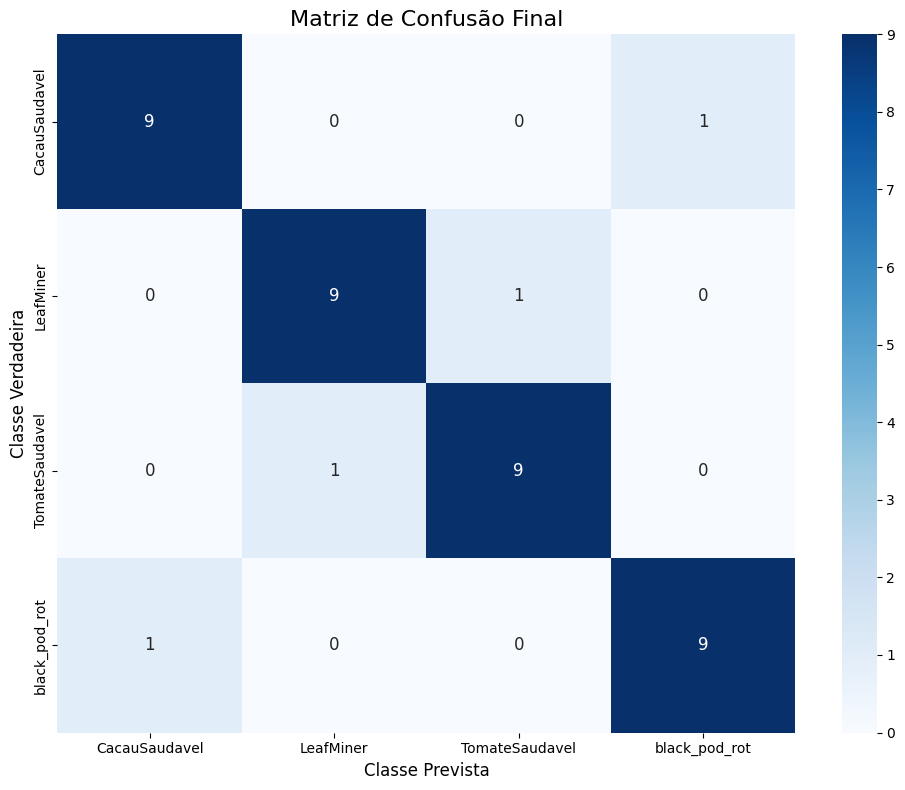


Matriz de Confusão salva em: matriz_confusao_val.png


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix

# FUNÇÃO 1: PREDIÇÃO DE IMAGEM ÚNICA

def predict_single_image(image_path, model, class_labels, show_image=True):
    try:
        img = image.load_img(image_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array /= 255.0
        img_batch = np.expand_dims(img_array, axis=0)

        predictions = model.predict(img_batch, verbose=0)

        predicted_index = np.argmax(predictions[0])
        predicted_class_name = class_labels[predicted_index]
        confidence = predictions[0][predicted_index]

        if show_image:
            plt.figure(figsize=(6, 6))
            plt.imshow(img)
            plt.axis('off')
            plt.title(
                f"Previsão: {predicted_class_name}\nConfiança: {confidence:.2%}",
                fontsize=12
            )
            plt.show()

        return predicted_class_name, confidence

    except Exception as e:
        print(f"Ocorreu um erro ao processar a imagem {image_path}: {e}")
        return None, None

# FUNÇÃO 2: MATRIZ DE CONFUSÃO

def plot_confusion_matrix(y_true, y_pred, class_labels,
                          save_path='confusion_matrix.png'):
    """
    Matriz de confusão:
    - Seaborn
    - cmap='Blues'
    - valores inteiros
    - arredondamento PARA BAIXO (floor)
    """

    # Calcula matriz
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)

    # GARANTE arredondamento para baixo
    cm = np.floor(cm).astype(int)

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=class_labels,
        yticklabels=class_labels,
        annot_kws={"size": 12}
    )

    plt.title('Matriz de Confusão Final', fontsize=16)
    plt.ylabel('Classe Verdadeira', fontsize=12)
    plt.xlabel('Classe Prevista', fontsize=12)

    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

    print(f"\nMatriz de Confusão salva em: {save_path}")

# FUNÇÃO 3: AVALIAR PASTA DE VALIDAÇÃO

def evaluate_validation_folder_with_cm(validation_dir, model, class_labels,
                                       cm_save_path='matriz_confusao_val.png'):
    if not os.path.isdir(validation_dir):
        print(f"Erro: Diretório de validação não encontrado em '{validation_dir}'")
        return

    print(f"\n--- Iniciando Avaliação na Pasta: {validation_dir} ---")

    y_true = []
    y_pred = []

    subfolders = [
        f for f in os.listdir(validation_dir)
        if os.path.isdir(os.path.join(validation_dir, f))
    ]

    valid_subfolders = [f for f in subfolders if f in class_labels]

    if not valid_subfolders:
        print(f"Aviso: Nenhuma subpasta corresponde às classes {class_labels}")
        return

    for folder_name in sorted(valid_subfolders):
        folder_path = os.path.join(validation_dir, folder_name)
        print(f"\nProcessando pasta: {folder_name}")

        image_files = [
            f for f in os.listdir(folder_path)
            if f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ]

        if not image_files:
            print("Nenhuma imagem encontrada.")
            continue

        for image_name in image_files:
            image_path = os.path.join(folder_path, image_name)

            predicted_class, _ = predict_single_image(
                image_path,
                model,
                class_labels,
                show_image=False
            )

            if predicted_class is not None:
                y_true.append(folder_name)
                y_pred.append(predicted_class)

    print("\n--- Avaliação concluída. Gerando Matriz de Confusão ---")

    if y_true:
        plot_confusion_matrix(y_true, y_pred, class_labels, cm_save_path)
    else:
        print("Nenhuma predição válida. Matriz não gerada.")

# BLOCO DE EXECUÇÃO

validation_folder_path = '/content/drive/MyDrive/TCC7/data/val'

if 'model' in locals() and 'class_labels' in locals():
    evaluate_validation_folder_with_cm(
        validation_folder_path,
        model,
        class_labels,
        cm_save_path='matriz_confusao_val.png'
    )
else:
    print("ERRO: Carregue o modelo e defina as classes antes.")
    print("Exemplo:")
    print("model = load_model('caminho/para/modelo.keras')")
    print("class_labels = ['CacauSaudavel', 'LeafMiner', 'TomateSaudavel', 'black_pod_rot']")